训练集样本数：m_train = 209
测试集样本数：m_test = 50
每张图片的高/宽：num_px = 64
每张图片的大小：(64, 64, 3)
训练集_图片 train_set_x 的维数：(209, 64, 64, 3)
训练集_标签 train_set_y 的维数：(1, 209)
测试集_图片 test_set_x 的维数：(50, 64, 64, 3)
测试集_标签 test_set_y 的维数：(1, 50)
训练集降维后 train_set_x_flatten 的维度：(12288, 209)
训练集_标签 train_set_y 的维数：(1, 209)
测试集降维后 test_set_x_flatten 的维度：(12288, 50)
测试集_标签 test_set_y 的维数：(1, 50)
--------------------------------训练模型--------------------------------
迭代 0 次后的代价: 0.693147
迭代 100 次后的代价: 0.584508
迭代 200 次后的代价: 0.466949
迭代 300 次后的代价: 0.376007
迭代 400 次后的代价: 0.331463
迭代 500 次后的代价: 0.303273
迭代 600 次后的代价: 0.279880
迭代 700 次后的代价: 0.260042
迭代 800 次后的代价: 0.242941
迭代 900 次后的代价: 0.228004
迭代 1000 次后的代价: 0.214820
迭代 1100 次后的代价: 0.203078
迭代 1200 次后的代价: 0.192544
迭代 1300 次后的代价: 0.183033
迭代 1400 次后的代价: 0.174399
迭代 1500 次后的代价: 0.166521
迭代 1600 次后的代价: 0.159305
迭代 1700 次后的代价: 0.152667
迭代 1800 次后的代价: 0.146542
迭代 1900 次后的代价: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %
learning rate is: 0.01
train accurac

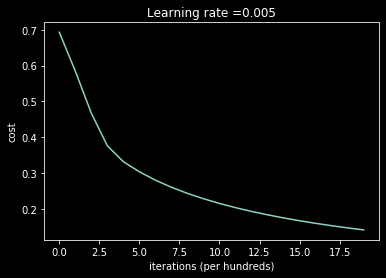

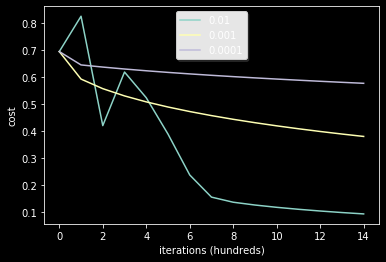

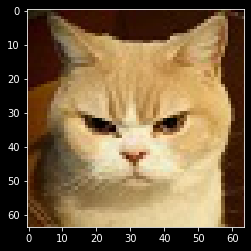

In [1]:
"""
本程序构造logistic回归（二）分类器来识别猫图
准确率：
"""

"""
一、包
"""

import numpy as np                      # numpy是python进行科学计算的基本软件包
import matplotlib.pyplot as plt         # matplotlib是一个著名的库，用于在python中绘制图表
import h5py                             # 是与H5文件中存储的数据集进行交互的常用软件包
import scipy
from PIL import Image
from scipy import ndimage               # PIL和scipy用来用自己的图片测试本模型
from lr_utils import load_dataset       

# %matplotlib inline

"""
二、预处理数据集 (train/test_set_x_orig --> train/test_set_x_flatten --> train/test_set_x)
- 找出问题的维度(demensions and shapes)-->(m_train, m_test, num_px, ...)
- reshape数据集(每个样本的维度变为(num_px * num_px * 3, 1))
- 标准化数据
"""

# 加载数据（cat/non-cat), load_dataset()函数定义在lr_utils.py
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
# "_orig"表示需要预处理，最终得到train_set_x 和test_set_x
# train_set_x_orig: 保存的是训练集里的图像数据（209张64*64的图像）的特征
# train_set_y: 保存的是训练集里的图像对应的分类值（cat：1 / non-cat：0）
# test_set_x_orig: 保存的是测试集里的图像数据（50张64*64的图像）的特征
# test_set_y: 保存的是测试集里的图像对应的分类值（cat：1 / non-cat：0）
# classes: 保存的是以bytes类型存储的两个字符串数据：[b' non-cat' b' cat' ]

# eg. train_set_x_orig的shape: (m_train, num_px, num_px, 3)
m_train = train_set_x_orig.shape[0]     # 训练样本数
m_test = test_set_x_orig.shape[0]       # 测试样本数
num_px = train_set_x_orig.shape[1]      # 训练图片的高/宽

# 打印出我们加载的数据的情况
print('训练集样本数：m_train = ' + str(m_train))                            # 209
print('测试集样本数：m_test = ' + str(m_test))                              # 50
print('每张图片的高/宽：num_px = ' + str(num_px))                           # 64
print('每张图片的大小：(' + str(num_px) + ', ' + str(num_px) + ', 3)')      # (64, 64, 3)
print('训练集_图片 train_set_x 的维数：' + str(train_set_x_orig.shape))     # (209, 64, 64, 3)
print('训练集_标签 train_set_y 的维数：' + str(train_set_y.shape))          # (1, 209)
print('测试集_图片 test_set_x 的维数：' + str(test_set_x_orig.shape))       # (50, 64, 64, 3)
print('测试集_标签 test_set_y 的维数：' + str(test_set_y.shape))            # (1, 50)

# reshape图像维度(shape)
# 为了方便起见，将训练集和测试集的图像维度从shape(num_px, num_px, 3)转为shape(num_px * num_px * 3, 1)
# 即将训练集和测试集的维度从shape(m_train/m_test, num_ox, num_px, 3)转换为shape(num_px * num_px * 3, m_train/m_test)
# 使得每一列代表一张图片
# tip：将矩阵X of shape(a, b, c, d)转换为X_flatten of shape(b*c*d, a)
# -----X_flatten = X.reshape(X.shape[0], -1).T
# -----reshape(x, y)函数中，将参数x，y其中任意一个值用-1代替，会被自动计算此轴长度
# 训练集train_set_x_orig的维度：(m_train, num_px, num_px, 3) = (209, 64, 64, 3)
# 测试集test_set_x_orig的维度：(m_test, num_px, num_px, 3) = (50, 64, 64, 3)
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

# 打印维度变换后的情况
print('训练集降维后 train_set_x_flatten 的维度：' + str(train_set_x_flatten.shape))         # (12288, 209)
print('训练集_标签 train_set_y 的维数：' + str(train_set_y.shape))                          # (1, 209)
print('测试集降维后 test_set_x_flatten 的维度：' + str(test_set_x_flatten.shape))           # (12288, 50)
print('测试集_标签 test_set_y 的维数：' + str(test_set_y.shape))                            # (1, 50)

# 集中并标准化数据集 center and standardize your dataset
# 处理图像数据只需要将每行都除以255（每个颜色通道的像素最大值）
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255

"""
三、学习算法的总体架构
算法的数学表达式：
0. x(i) = x(i)_flatten / 255
1. z(i) = w.T x(i) + b
2. yhat(i) = a(i) = sigmoid(z(i))
3. L(a(i),y(i)) = -y(i)log(a(i)) - (1-y(i))log(1-a(i))          # 损失函数
6. J = 1/m Σ_(i=1~m) L(a(i),y(i))                               # 代价函数

关键步骤：
- 初始化模型参数
- 通过最小化代价（minimizing the cost）来学习模型参数
- 用学习到的参数（在测试集上）进行预测
- 分析结果并总结
"""


"""
四、建立模型的各个部分
建立神经网络的主要步骤：
1. 定义模型结构（eg.输入特征数）
2. 初始化模型参数
3. 循环：
    - 计算当前损失（前向传播）
    - 计算当前梯度（后向传播）
    - 更新参数（梯度下降）

实现以下一些函数：
- 初始化(w, b)
- 迭代优化损失来学习参数(w, b)：
    - 计算损失和梯度
    - 利用梯度下降更新参数
- 利用学习得到的参数(w, b)预测所给样例集的标签
"""

def sigmoid(z): 
    """
    计算sigmoid(z)的值
    参数：
        z -- 任意大小的标量或numpy数组
    返回值：
        s -- sigmoid(z)
    """
    s = 1 / (1 + np.exp(-z))

    return s

# 0初始化参数w和b
def initialize_with_zeros(dim): 
    """
    此函数为w创建一个维度为(dim, 1)的0向量，并且将b初始化为0

    参数：
        dim -- 我们想要的w向量的大小（或者在这种情况下的参数数量）
    返回值：
        w -- 维度为(dim, 1)的初始化向量
        b -- 初始化的标量（对应于偏差）
    """
    w = np.zeros((dim, 1))
    b = 0

    # 使用断言确保数据维度的正确性
    assert(w.shape == (dim, 1))                             # w的维度是(dim, 1)
    assert(isinstance(b, float) or isinstance(b, int))      # b的类型是float或int

    return w, b

# 前向和后向传播，来学习参数
# 前向传播计算损失函数，后向传播计算梯度
def propagate(w, b, X, Y): 
    """
    前向传播计算损失函数，后向传播计算梯度

    参数：
        w -- 权重，大小为(num_px * num_px * 3, 1)的numpy array
        b -- 偏差，标量
        X -- 大小为(num_px * num_px * 3, number of examples)的数据
        Y -- 大小为(1, number of examples)的正确标签向量（0 - non-cat, 1 -- cat）
    返回值：
        cost -- logisitic回归负log似然成本
        dw -- 相对于w的损失梯度，因此与w维度相同
        db -- 相对于b的损失梯度，因此与b形状相同
    """
    m =X.shape[1]                                                       # 样本数量

    # 前向传播，计算cost
    A = sigmoid(np.dot(w.T, X) + b)                                     # 计算激活值，参考三、公式1，2
    cost = -1 / m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))     # 计算cost，参考三、公式3，6

    # 反向传播，寻找梯度（偏导）
    dw = 1 / m * np.dot(X, (A - Y).T)
    db = 1 / m * np.sum(A - Y)

    # 使用断言确保数据的正确性
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    # 创建一个梯度字典，保存dw和db
    grads = {"dw": dw,
            "db": db}

    return grads, cost

# 优化函数，通过梯度下降法更新优化参数w和b
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    此函数通过运行梯度下降算法来优化 w 和 b 
    目标是通过最小化代价函数J来学习 w 和 b 
    对于参数θ，更新规则为：θ = θ - α dθ ，其中α为学习率

    参数：
        w -- 权重，大小为(num_px * num_px * 3, 1)的numpy array
        b -- 偏差，标量
        X -- shape (num_px * num_px * 3, number of examples)的数据
        Y -- shape (1, number of examples)的真标签向量，(containing 0 if non-cat, 1 if cat)
        num_iterations -- 优化循环的迭代次数
        learning_rate -- 梯度下降更新规则的学习率
        print_cost -- 每100步为真，打印一次代价
    返回值：
        params -- 包含权重w和偏差b的字典
        grads -- 包含权重和偏差相对于代价函数的梯度的字典
        costs -- 优化过程计算的所有代价的列表，用于绘制学习曲线

    迭代以下两个步骤：
        -- 计算当前参数的代价和梯度，利用propagate()
        -- 用w和b的梯度下降规则更新参数
    """
    costs = []

    for i in range(num_iterations):
        # 计算代价和梯度
        grads, cost = propagate(w, b, X, Y)

        # 从grads字典中获取dw和db
        dw = grads["dw"]
        db = grads["db"]

        # 更新规则
        w = w - learning_rate * dw
        b = b - learning_rate * db

        # 记录代价
        if i % 100 == 0:
            costs.append(cost)

        # 每100次训练迭代打印一次代价
        if print_cost and i % 100 == 0:
            print ("迭代 %i 次后的代价: %f" %(i, cost))

    params = {"w": w,
            "b": b}
    
    grads = {"dw": dw,
            "db": db}

    return params, grads, costs

# 预测函数，利用w和b来预测数据集X的标签
# 2个步骤：
# 1、计算Yhat = A = σ(w.T X + b)
# 2、若激活值<=0.5，则将a的值变为0；若激活值>0.5，则将a的值变为1。将预测存储在Y_prediction
def predict(w, b, X):
    """
    利用学习logistic回归的参数(w, b)来预测标签是0还是1

    参数：
        w -- 权重，大小为(num_px * num_px * 3, 1)的numpy array
        b -- 偏差，标量
        X -- 大小为(num_px * num_px * 3, number of examples)的数据
    返回值：
        Y_prediction -- 包含X中所有样例的预测(0/1)的numpy数组（向量）
    """
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    # 计算向量A预测猫存在该图片的概率
    A = sigmoid(np.dot(w.T, X) + b)

    for i in range(A.shape[1]):
        # 将概率A[0, i]转换为正确的预测p[0, i]
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0

    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

"""
五、将所有函数整合成一个模型model
- Y_prediction_test 用作测试集预测
- Y_prediction_train 用作训练集预测
- w, costs, grads 用作optimize()输出
"""

# 整合model()函数
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    参数：
        X_train -- 训练集，维度(num_px * num_px * 3, m_train)
        Y_train -- 训练标签集，维度(1, m_train)
        X_test -- 测试集，维度(num_px * num_px * 3, m_test)
        Y_test -- 测试标签集，维度(1, m_test)
        num_iterations -- 超参数，代表优化参数的迭代次数
        learning_rate -- 超参数，代表optimize()中更新规则的学习率
        print_cost -- 每100步为真，打印一次代价
    返回值：
        d -- 包含模型信息的字典
    """
    # 零初始化参数
    w, b = initialize_with_zeros(X_train.shape[0])

    # 梯度下降
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # 从参数字典中检索参数w和b
    w = parameters["w"]
    b = parameters["b"]

    # 预测训练/测试集样本
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # 打印训练/测试准确率
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

# 训练模型
print('--------------------------------训练模型--------------------------------')
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)
# 训练集准确性≈99%，近似于100%，测试集准确性为70%，对于一个简单模型来说并不差

# 绘制图
# 学习曲线（costs随迭代次数增加而下降）
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

"""
六、进一步分析（可选）
学习率的选择
"""

# 学习率的选择
# 学习率决定参数更新的速率
# 如果学习率过大，我们可能错过最优质；如果学习率过小，需要太多次迭代才能收敛到最佳值
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

"""
七、 测试自己的图片（可选）
"""

my_image = "my_image3.jpg"   # change this to the name of your image file 

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
image = image/255.
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")
